In [1]:
import numpy as np
from CMO_A1 import f1, f2, f3, f4
import matplotlib.pyplot as plt

In [2]:
Sr_No = 22221

# Convex and Coercive functions

## Problem 1

### a

In [3]:
def plot(f, a, b):
    # Divide the interval [a, b] into 10^6 equal parts
    x = np.linspace(a, b, 10**6)
    # Evaluate the function at each point
    y = [f(Sr_No, i) for i in x]
    # Plot the function
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f.__name__)
    plt.grid(True)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.show()

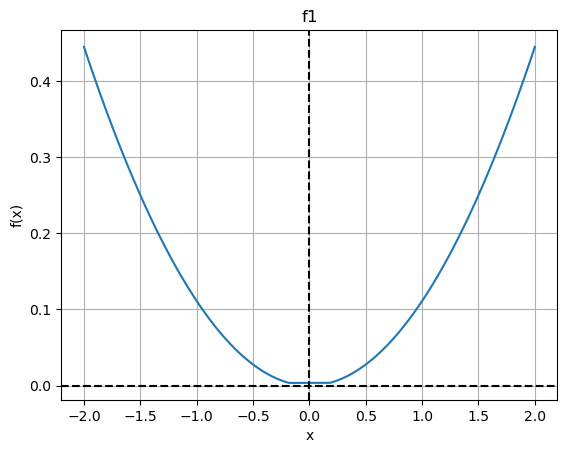

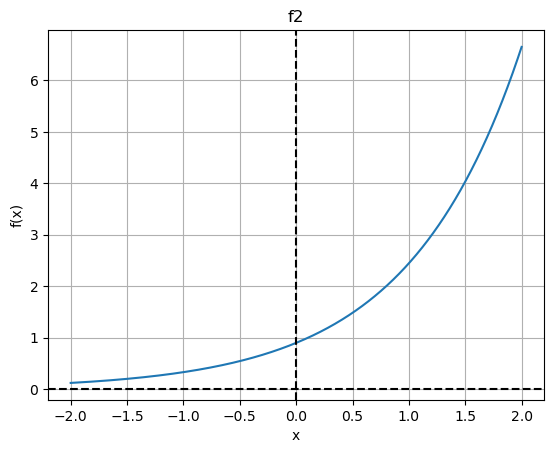

In [4]:
for f in [f1, f2]:
    plot(f, -2, 2)


Analysis of f1:
Is convex: True
Convexity type: convex but not strongly convex


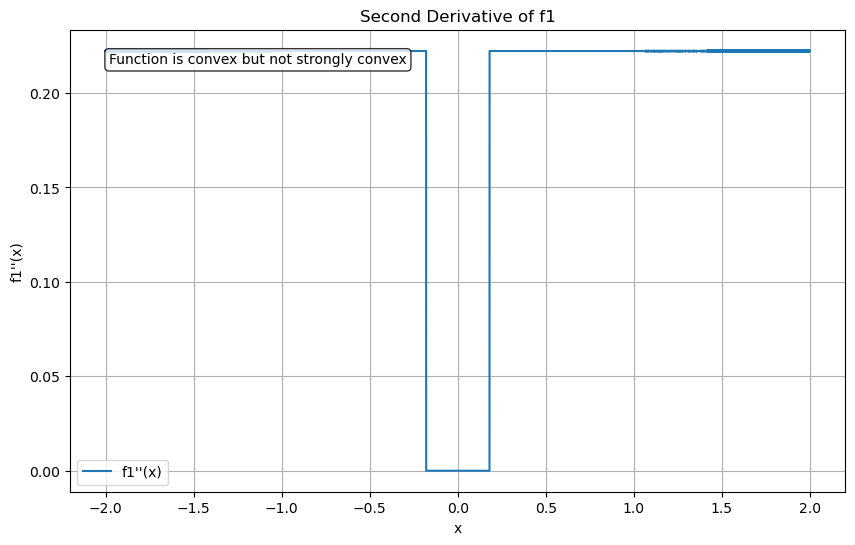


Analysis of f2:
Is convex: True
Convexity type: strongly convex


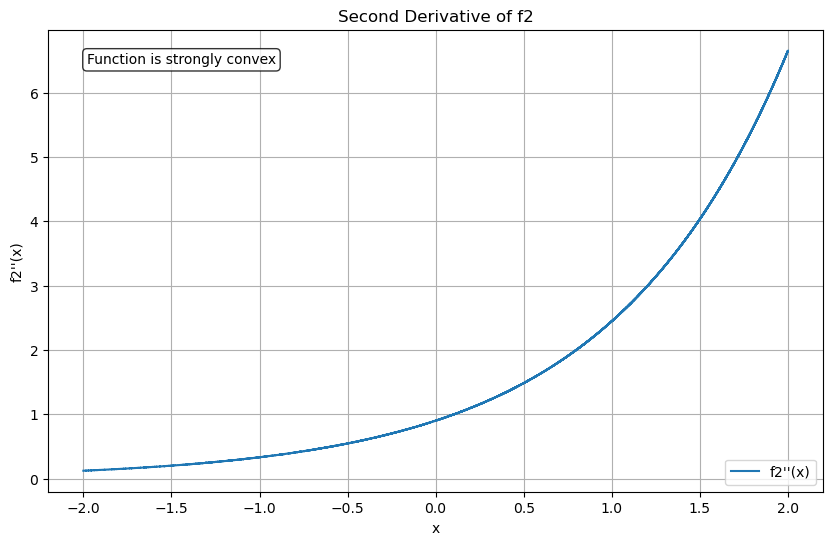

In [5]:
def double_derivative(func, Sr_No, x):
    h=1e-6
    # Calculate the second derivative of a function at a point x
    return (func(Sr_No, x + h) - 2 * func(Sr_No, x) + func(Sr_No, x - h)) / (h ** 2)

def isConvex(functionname, interval):
    a, b = interval
    num_points = 1000000 # Fixed number of points as per requirement
    x_values = np.linspace(a, b, num_points)
    second_derivatives = np.array([double_derivative(functionname, Sr_No, x) for x in x_values])
    
    min_second_derivative = np.min(second_derivatives)
    zero_crossings = np.where(np.diff(np.sign(second_derivatives)))[0]
    
    if min_second_derivative > 1e-20:
        return True, "strongly convex", x_values, second_derivatives
    elif min_second_derivative == 0:
        return True, "convex but not strongly convex", x_values, second_derivatives
    else:
        return False, "not convex", x_values, second_derivatives

def plot_second_derivative(x_values, second_derivatives, func_name, convexity_type):
    # Plot the second derivative of the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, second_derivatives, label=f"{func_name}''(x)")
    plt.title(f"Second Derivative of {func_name}")
    plt.xlabel('x')
    plt.ylabel(f"{func_name}''(x)")
    plt.legend()
    plt.grid(True)
    plt.text(0.05, 0.95, f"Function is {convexity_type}", transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.show()

# Test the functions
for i, f in enumerate([f1, f2], 1):
    print(f"\nAnalysis of f{i}:")
    is_convex, convexity_type, x_values, second_derivatives = isConvex(f, (-2, 2))
    print(f"Is convex: {is_convex}")
    print(f"Convexity type: {convexity_type}")
    
    # Plot the second derivative
    plot_second_derivative(x_values, second_derivatives, f"f{i}", convexity_type)

### b

In [6]:
def first_derivative(function, Sr_No, x):
    h = 1e-6
    return (function(Sr_No, x + h) - function(Sr_No, x)) / h

def minima(function, Sr_No, interval):
    a, b = interval
    num_points = 1000000 # Fixed number of points as per requirement
    x_values = np.linspace(a, b, num_points)
    first_derivatives = np.array([first_derivative(function, Sr_No, x) for x in x_values])
    minimum_first_derivative = np.min(first_derivatives)
    maximum_first_derivative = np.max(first_derivatives)

    if minimum_first_derivative > 0:
        minima = [(a, function(Sr_No, a))]
    elif maximum_first_derivative < 0:
        minima = [(b, function(Sr_No, b))]
    else:
        # Find the point in x_values where the first derivative is less than 1e-10
        minima = [(x_values[i], function(Sr_No, x_values[i])) for i in range(num_points) if abs(first_derivatives[i]) < 1e-10]
    return minima, x_values, first_derivatives

def plot_function_and_derivative(function, Sr_No, x_values, first_derivatives, minima, func_name):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot the original function
    y_values = [function(Sr_No, x) for x in x_values]
    ax1.plot(x_values, y_values, label=f"{func_name}(x)")
    ax1.set_title(f"Function {func_name}")
    ax1.set_xlabel('x')
    ax1.set_ylabel(f"{func_name}(x)")
    ax1.legend()
    ax1.grid(True)
    
    if minima:
        x_min = min(minima, key=lambda x: x[0])[0]
        x_max = max(minima, key=lambda x: x[0])[0]
        
        # Color the area between x_min and x_max red
        ax1.axvspan(x_min, x_max, color='red', alpha=0.3)
        
        # Mark x_min and x_max points
        ax1.scatter([x_min, x_max], [function(Sr_No, x_min), function(Sr_No, x_max)], color='red', s=50, zorder=5)
    
    # Plot the derivative
    ax2.plot(x_values, first_derivatives, label=f"{func_name}'(x)")
    ax2.set_title(f"First Derivative of {func_name}")
    ax2.set_xlabel('x')
    ax2.set_ylabel(f"{func_name}'(x)")
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()


Analysis of f1:
x_min: -0.01999801999802009
x_max: 0.019998019998019867


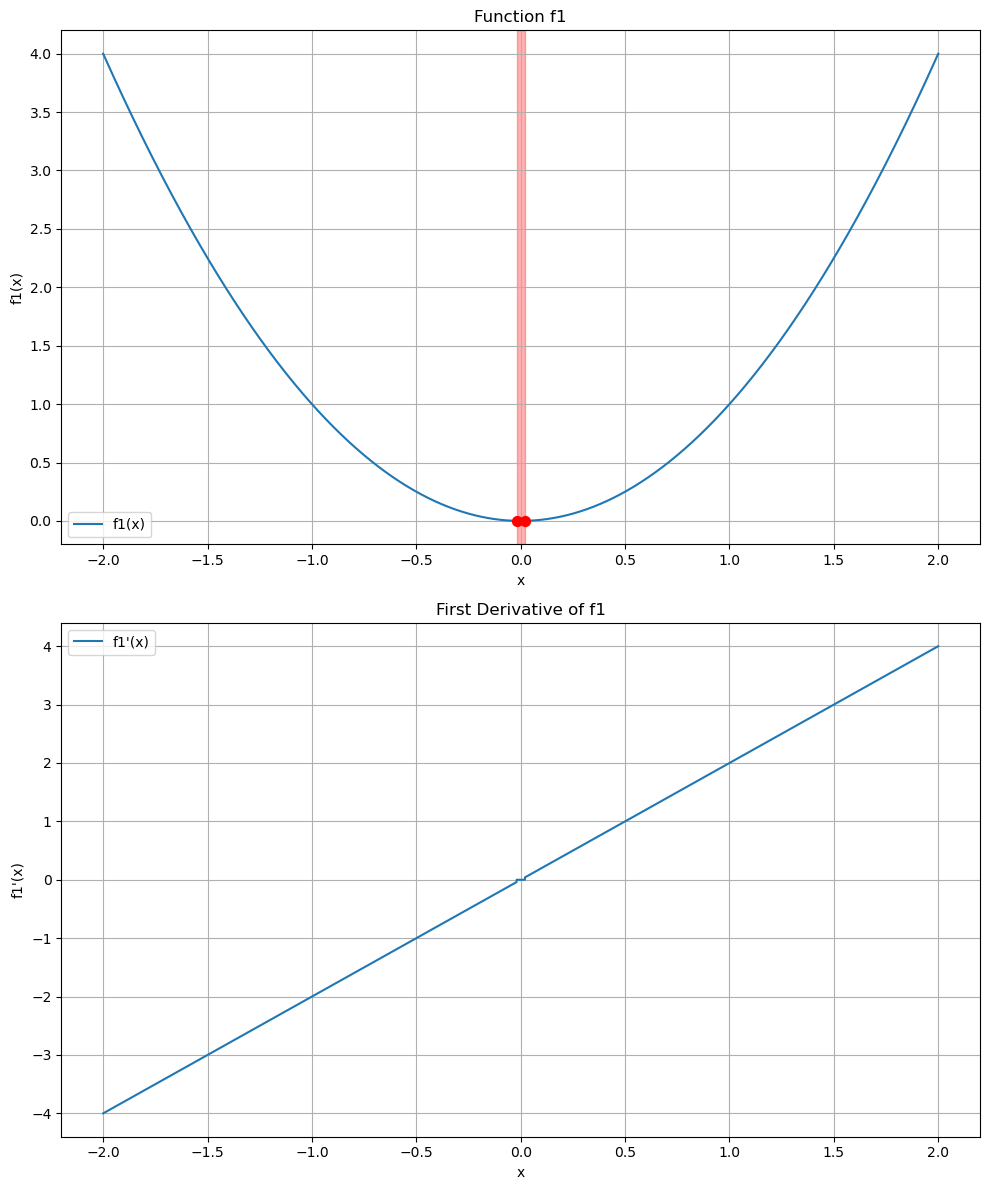


Analysis of f2:
x_min: -2
x_max: -2


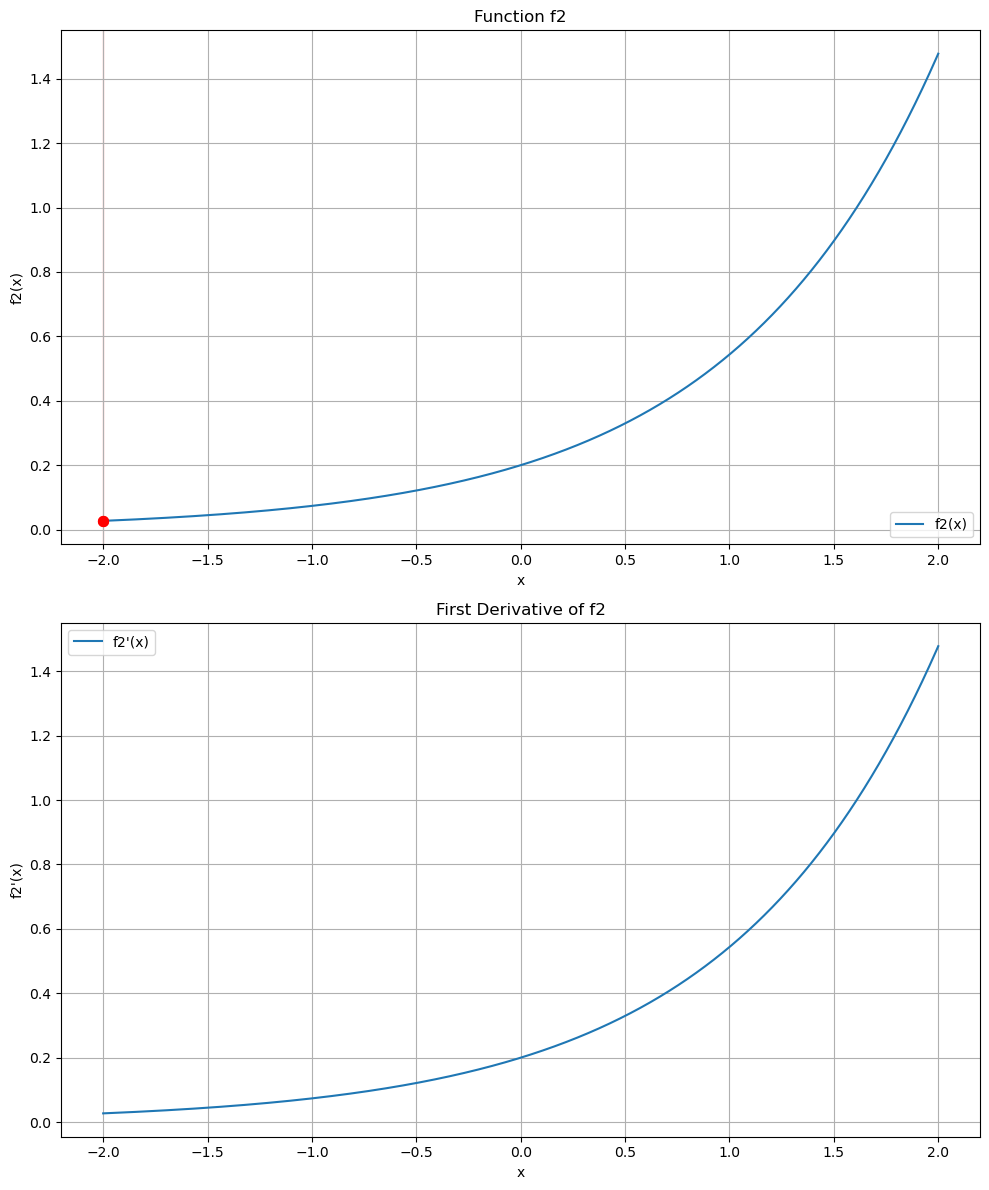

In [7]:
# Test the functions
for i, f in enumerate([f1, f2], 1):
    print(f"\nAnalysis of f{i}:")
    minima_points, x_values, first_derivatives = minima(f, i, (-2, 2))
    
    if minima_points:
        x_min = min(minima_points, key=lambda x: x[0])[0]
        x_max = max(minima_points, key=lambda x: x[0])[0]
        print(f"x_min: {x_min}")
        print(f"x_max: {x_max}")
    else:
        print("No minima found in the given interval.")
    
    # Plot the function and its derivative
    plot_function_and_derivative(f, i, x_values, first_derivatives, minima_points, f"f{i}")

In [8]:
print("Minima of f1", f1(Sr_No, -0.02))
print("Minima of f2", f2(Sr_No, -2))

Minima of f1 0.0036
Minima of f2 0.12180175491295141


## Problem 2

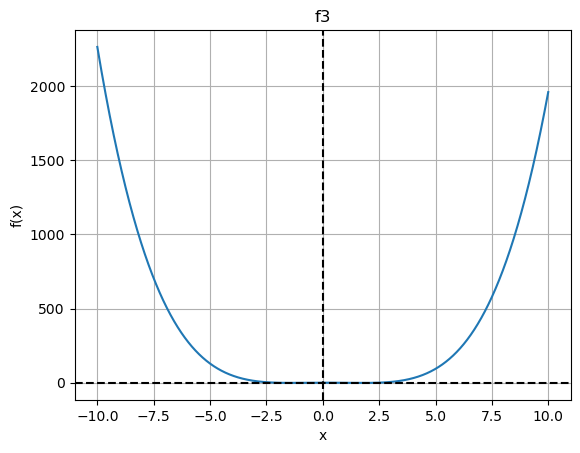

In [9]:
# Plot f3 in (-10, 10)

plot(f3, -10, 10)

### a

In [1]:
def isCoercive(functionname):
    # Check if the fourth derivative at x = 0 is positive or not
    h = 1e-3
    fourth_derivative = (functionname(Sr_No, 2*h) - 4 * functionname(Sr_No, h) + 6 * functionname(Sr_No, 0) - 4 * functionname(Sr_No, -h) + functionname(Sr_No, -2 * h)) / (h ** 4)
    if fourth_derivative > 0:
        return True, "coercive"
    else:
        return False, "not coercive"

### b

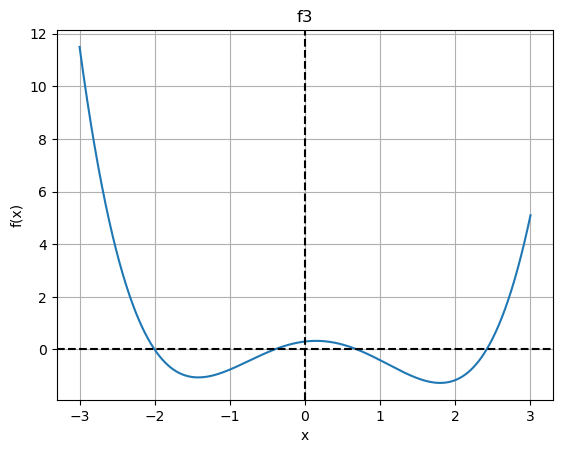

In [12]:
plot (f3, -3, 3)

In [13]:
def bisection_method(func, interval):
    a, b = interval
    tol = 1e-10
    max_iter = 1000
    iter = 0
    while abs(b - a) > tol and iter < max_iter:
        c = (a + b) / 2
        if func(Sr_No, a) * func(Sr_No, c) < 0:
            b = c
        else:
            a = c
        iter += 1
    return c

In [14]:
def deriv_f3(Sr_No, x):
    h = 1e-6
    return (f3(Sr_No, x + h) - f3(Sr_No, x)) / (h)

def double_deriv_f3(Sr_No, x):
    h = 1e-6
    return (deriv_f3(Sr_No, x + h) - deriv_f3(Sr_No, x)) / (h)

def FindStationaryPoints(func):
    # Create a dictionary to store the stationary points and their labels
    stationary_points = {}
    # Find the roots of the function
    intervals = [(-3, -1.5), (-1.5, 0), (0, 1.5), (1.5, 3)]
    # Call the bisection method for each interval and add the label root to the dictionary
    for i, interval in enumerate(intervals, 1):
        stationary_points[bisection_method(func, interval)] = f"root{i}"
    intervals_for_extrema = [(-2, -1), (-1, 1), (1, 2)]
    # Call the bisection method for each interval to f3' and add the label extrema to the dictionary
    for interval in intervals_for_extrema:
        stationary_points[bisection_method(deriv_f3, interval)] = "extrema"
    # For each point in dictionary with label extrema, check if f3''(x) is positive or negative or zero and append the label accordingly
    for point in [x for x in stationary_points if stationary_points[x] == "extrema"]:
        if double_deriv_f3(Sr_No, point) > 0:
            stationary_points[point] = "local minimum"
        elif double_deriv_f3(Sr_No, point) < 0:
            stationary_points[point] = "local maximum"
        else:
            stationary_points[point] = "saddle point"

    return stationary_points

# Test the function
stationary_points = FindStationaryPoints(f3)
print("Stationary points of f3:", stationary_points)

Stationary points of f3: {-2.0026369585830253: 'root1', -0.40414530897396617: 'root2', 0.690238843759289: 'root3', 2.416543423983967: 'root4', -1.4206155920983292: 'local minimum', 0.1467414572252892: 'local maximum', 1.798872635292355: 'local minimum'}


# Gradient Descent

## Problem 1

### a

In [15]:
# Create a NumPy array with 5 elements
x = np.array([0, 1, 2, 3, 4])  # or any other 5 elements

# Now call the function
fx, gradfx = f4(Sr_No, x)

print("f4(x) =", fx)
print("grad f4(x) =", gradfx)

f4(x) = 6060.0
grad f4(x) = [1.000e+00 2.001e+03 2.001e+03 1.501e+03 4.010e+02]


In [16]:
# The function call for f4 is fx, gradfx = f4(Sr.No, x)

def ConstantGradientDescent(alpha, initialx):
    # x is a numpy array
    x = initialx
    fx, gradfx = f4(Sr_No, x)
    max_iter = 10000
    # Create an array to store norm of gradient at each iteration
    # Create an array to store function value at each iteration
    # Create an array to store x at each iteration

    grad_list = []
    fx_list = []
    x_list = []

    for i in range(max_iter):
        x_new = x - alpha * gradfx
        fx_new, gradfx_new = f4(Sr_No, x_new)
        x = x_new
        fx = fx_new
        gradfx = gradfx_new

        # Append the norm of the gradient, function value and x to the respective lists

        grad_list.append(np.linalg.norm(gradfx))
        fx_list.append(fx)
        x_list.append(x)

    print("After ", max_iter, "iterations, x =", x, "f(x) =", fx)

    # Return the lists
    return grad_list, fx_list, x_list

In [17]:
alpha = 10**-5
initialx = np.array([0, 0, 0, 0, 0])

a_1, b_1, c_1 = ConstantGradientDescent(alpha, initialx)

After  10000 iterations, x = [-4.50024751e-05 -5.00000000e-04 -1.00000000e-03 -2.00000000e-03
 -9.99954827e-03] f(x) = -0.006772501227364909


### b

In [18]:
def DiminishingGradientDescent(InitialAlpha, initialx):
    x = initialx
    fx, gradfx = f4(Sr_No, x)
    max_iter = 10000
    alpha = InitialAlpha * 100
    # Create an array to store norm of gradient at each iteration
    # Create an array to store function value at each iteration
    # Create an array to store x at each iteration

    grad_list = []
    fx_list = []
    x_list = []

    for i in range(max_iter):
        x_new = x - alpha * gradfx
        fx_new, gradfx_new = f4(Sr_No, x_new)
        x = x_new
        fx = fx_new
        gradfx = gradfx_new
        alpha = InitialAlpha / (i + 1)

        # Append the norm of the gradient, function value and x to the respective lists

        grad_list.append(np.linalg.norm(gradfx))
        fx_list.append(fx)
        x_list.append(x)

    print("After ", max_iter, "iterations, x =", x, "f(x) =", fx)

    # Return the lists

    return grad_list, fx_list, x_list

In [19]:
a_2, b_2, c_2 = DiminishingGradientDescent(alpha, initialx)

After  10000 iterations, x = [-0.00014865 -0.00091097 -0.001      -0.00104778 -0.00108767] f(x) = -0.0022860714127654882


### c

In [20]:
def InExactLineSearch(c1, c2, gamma):
    initialx = np.array([0, 0, 0, 0, 0])
    x = initialx
    fx, gradfx = f4(Sr_No, x)
    max_iter = 10000
    alpha = 1

    # Create an array to store norm of gradient at each iteration
    # Create an array to store function value at each iteration
    # Create an array to store x at each iteration

    grad_list = []
    fx_list = []
    x_list = []

    for i in range(max_iter):
        p = -gradfx  # steepest descent direction
        x_new = x + alpha * p
        fx_new, gradfx_new = f4(Sr_No, x_new)

        # Armijo condition
        if fx_new > fx + c1 * alpha * np.dot(gradfx, p):
            alpha *= gamma
        # Curvature condition
        elif np.dot(gradfx_new, p) < c2 * np.dot(gradfx, p):
            alpha *= gamma
        else:
            x = x_new
            fx, gradfx = fx_new, gradfx_new
            alpha = 1  # reset alpha


        # Append the norm of the gradient, function value and x to the respective lists

        grad_list.append(np.linalg.norm(gradfx))
        fx_list.append(fx)
        x_list.append(x)

    print("After ", max_iter, "iterations, x =", x, "f(x) =", fx)

    # Return the lists

    return grad_list, fx_list, x_list

In [21]:
a_3, b_3, c_3 = InExactLineSearch(0.1, 0.9, 0.5)

After  10000 iterations, x = [-4.50142841e-05 -5.00000000e-04 -1.00000000e-03 -2.00000000e-03
 -9.99800092e-03] f(x) = -0.006772501036203483


### d

In [22]:
f4(Sr_No, np.array([0, 0, 0, 0, 0]))

(0.0, array([1., 1., 1., 1., 1.]))

In [23]:
f4(Sr_No, np.array([1, 0, 0, 0, 0]))

(11111.5, array([2.2222e+04, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]))

In [24]:
f4(Sr_No, np.array([0, 1, 0, 0, 0]))

(1001.0, array([1.000e+00, 2.001e+03, 1.000e+00, 1.000e+00, 1.000e+00]))

In [25]:
f4(Sr_No, np.array([0, 0, 1, 0, 0]))

(501.0, array([1.000e+00, 1.000e+00, 1.001e+03, 1.000e+00, 1.000e+00]))

In [26]:
f4(Sr_No, np.array([0, 0, 0, 1, 0]))

(251.0, array([  1.,   1.,   1., 501.,   1.]))

In [27]:
f4(Sr_No, np.array([0, 0, 0, 0, 1]))

(51.0, array([  1.,   1.,   1.,   1., 101.]))

In [28]:
A = np.array([[22221, 0, 0, 0, 0],
                [0, 2000, 0, 0, 0],
                [0, 0, 1000, 0, 0],
                [0, 0, 0, 500, 0],
                [0, 0, 0, 0, 100]])

In [29]:
print(A)

[[22221     0     0     0     0]
 [    0  2000     0     0     0]
 [    0     0  1000     0     0]
 [    0     0     0   500     0]
 [    0     0     0     0   100]]


In [36]:
def ExactLineSearch():
    initialx = np.array([0, 0, 0, 0, 0])
    x = initialx
    fx, gradfx = f4(Sr_No, x)
    max_iter = 10000

    # Create lists to store information
    grad_list = []
    fx_list = []
    x_list = []

    for i in range(max_iter):
        p = -gradfx  # steepest descent direction
        
        # Ensure that A is correctly defined and compatible with p
        if np.linalg.norm(p) == 0:
            # Avoid division by zero if p is zero
            alpha = 0
        else:
            # Calculate the optimal step size alpha
            alpha = -np.dot(gradfx, p) / np.dot(np.dot(p.T, A), p)

        x_new = x + alpha * p
        fx_new, gradfx_new = f4(Sr_No, x_new)
        
        x = x_new
        fx = fx_new
        gradfx = gradfx_new

        # Append the norm of the gradient, function value, and x to the lists
        grad_list.append(np.linalg.norm(gradfx))
        fx_list.append(fx)
        x_list.append(x)

    print("After ", max_iter, "iterations, x =", x, "f(x) =", fx)

    # Return the lists
    return grad_list, fx_list, x_list

In [37]:
a_4, b_4, c_4 = ExactLineSearch()

After  10000 iterations, x = [-4.50024751e-05 -5.00000000e-04 -1.00000000e-03 -2.00000000e-03
 -1.00000000e-02] f(x) = -0.006772501237568064


### Plots

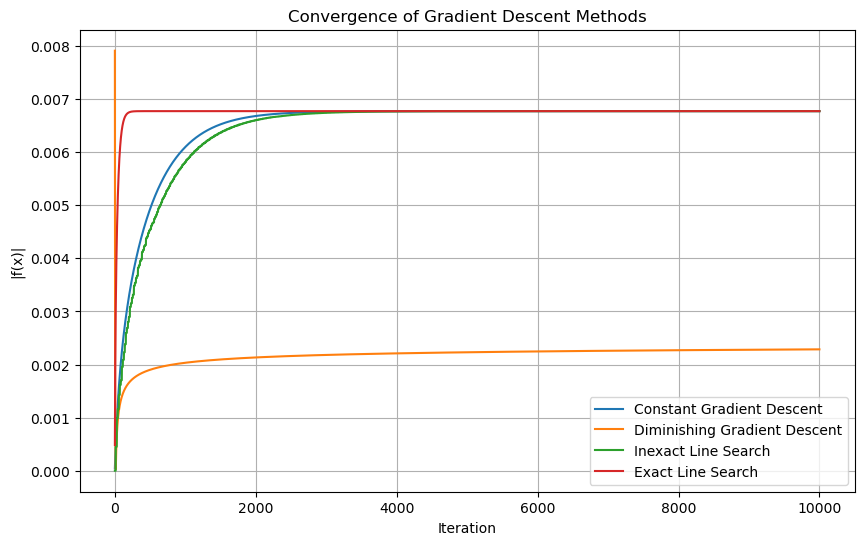

In [38]:
# Plot |b_i| vs i for all four methods on a same graph

plt.figure(figsize=(10, 6))
plt.plot(np.abs(b_1), label='Constant Gradient Descent')
plt.plot(np.abs(b_2), label='Diminishing Gradient Descent')
plt.plot(np.abs(b_3), label='Inexact Line Search')
plt.plot(np.abs(b_4), label='Exact Line Search')

plt.xlabel('Iteration')
plt.ylabel('|f(x)|')
plt.title('Convergence of Gradient Descent Methods')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Add 0.006772501227364909 to b_1

b_1 = [x + 0.006772501227364909 for x in b_1]

# Add 0.0022860714127654882 to b_2

b_2 = [x + 0.0022860714127654882 for x in b_2]

# Add 0.006772501036203483 to b_3

b_3 = [x + 0.006772501036203483 for x in b_3]

# Add 0.006772501237568064 to b_4

b_4 = [x + 0.006772501237568064 for x in b_4]

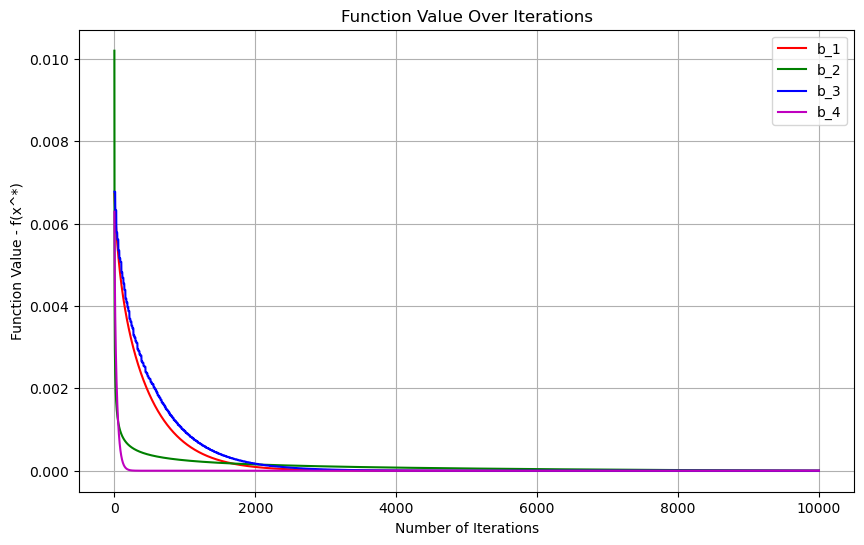

In [40]:
# Plot b_1, b_2, b_3, and b_4

plt.figure(figsize=(10, 6))

# Plot each list with a different color

plt.plot(b_1, 'r-', label='b_1')  # Red color
plt.plot(b_2, 'g-', label='b_2')  # Green color
plt.plot(b_3, 'b-', label='b_3')  # Blue color
plt.plot(b_4, 'm-', label='b_4')  # Magenta color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('Function Value - f(x^*)')
plt.title('Function Value Over Iterations')
plt.legend()  # Show the legend

# Display the plot
plt.grid(True)
plt.show()

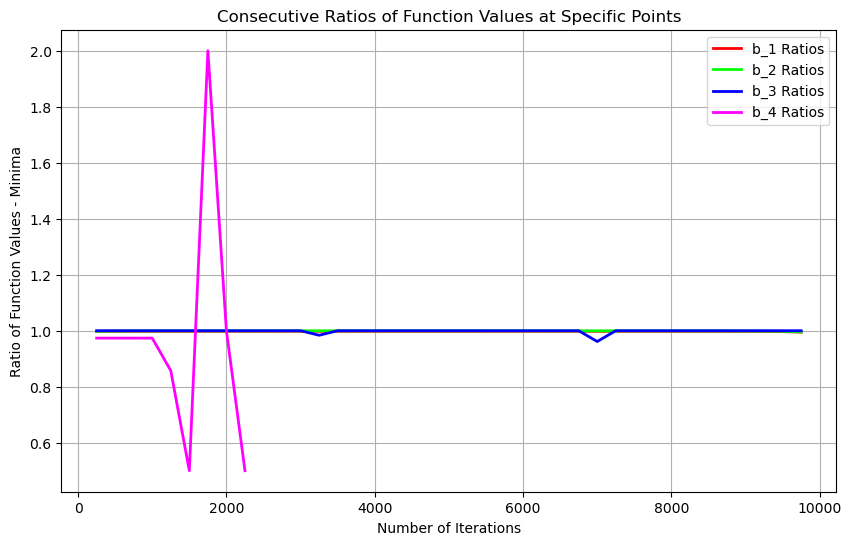

In [41]:
# Function to calculate consecutive ratios, skipping zero values and keeping points at specific indices
def calculate_ratios_at_intervals(b, interval_points):
    ratios = [b[i+1] / b[i] for i in range(len(b)-1) if b[i] != 0 and b[i+1] != 0]
    return [ratios[i-1] for i in interval_points if i-1 < len(ratios)]

# Define the specific intervals: 250, 500, 750, ..., len(b_1)
max_length = min(len(b_1), len(b_2), len(b_3), len(b_4))
interval_points = range(250, max_length, 250)

# Calculate consecutive ratios at specified intervals
ratios_b1 = calculate_ratios_at_intervals(b_1, interval_points)
ratios_b2 = calculate_ratios_at_intervals(b_2, interval_points)
ratios_b3 = calculate_ratios_at_intervals(b_3, interval_points)
ratios_b4 = calculate_ratios_at_intervals(b_4, interval_points)

# Adjust the iterations to match the length of the calculated ratios
iterations_b1 = list(range(250, 250 * (len(ratios_b1) + 1), 250))
iterations_b2 = list(range(250, 250 * (len(ratios_b2) + 1), 250))
iterations_b3 = list(range(250, 250 * (len(ratios_b3) + 1), 250))
iterations_b4 = list(range(250, 250 * (len(ratios_b4) + 1), 250))

plt.figure(figsize=(10, 6))

# Plot with distinguishable colors
plt.plot(iterations_b1, ratios_b1, color='#FF0000', label='b_1 Ratios', linewidth=2)  # bright red
plt.plot(iterations_b2, ratios_b2, color='#00FF00', label='b_2 Ratios', linewidth=2)  # bright green
plt.plot(iterations_b3, ratios_b3, color='#0000FF', label='b_3 Ratios', linewidth=2)  # bright blue
plt.plot(iterations_b4, ratios_b4, color='#FF00FF', label='b_4 Ratios', linewidth=2)  # magenta

# Labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Ratio of Function Values - Minima')
plt.title('Consecutive Ratios of Function Values at Specific Points')

# Add grid for better readability
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

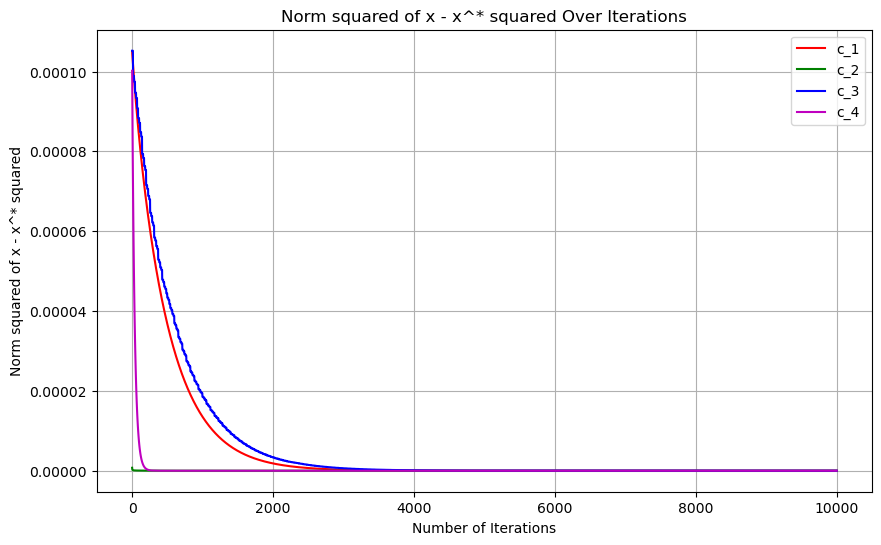

In [42]:
x_1 = np.array([-4.50024751e-05, -5.00000000e-04, -1.00000000e-03, -2.00000000e-03, -9.99954827e-03])
x_2 = np.array([-0.00014865, -0.00091097, -0.001, -0.00104778, -0.00108767])
x_3 = np.array([-4.50142841e-05, -5.00000000e-04, -1.00000000e-03, -2.00000000e-03, -9.99800092e-03])
x_4 = np.array([-4.50024751e-05, -5.00000000e-04, -1.00000000e-03, -2.00000000e-03, -1.00000000e-02])

# Replace each c in c_1 by norm squared of c - x_1

c_1 = [np.linalg.norm(c - x_1) ** 2 for c in c_1]
c_2 = [np.linalg.norm(c - x_2) ** 2 for c in c_2]
c_3 = [np.linalg.norm(c - x_3) ** 2 for c in c_3]
c_4 = [np.linalg.norm(c - x_4) ** 2 for c in c_4]

# Plot c_1, c_2, c_3, and c_4

plt.figure(figsize=(10, 6))

# Plot each list with a different color

plt.plot(c_1, 'r-', label='c_1')  # Red color
plt.plot(c_2, 'g-', label='c_2')  # Green color
plt.plot(c_3, 'b-', label='c_3')  # Blue color
plt.plot(c_4, 'm-', label='c_4')  # Magenta color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('Norm squared of x - x^* squared')

plt.title('Norm squared of x - x^* squared Over Iterations')

plt.legend()  # Show the legend

# Display the plot
plt.grid(True)
plt.show()

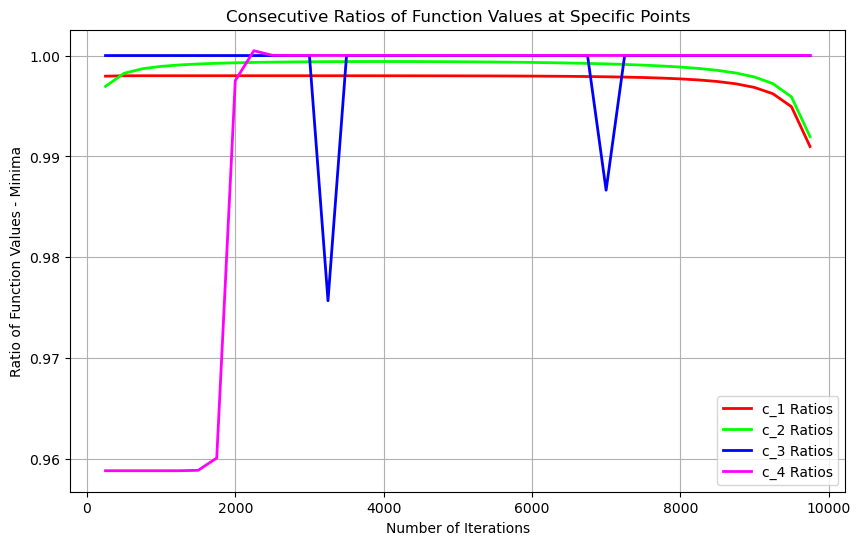

In [43]:
# Define the specific intervals: 250, 500, 750, ..., len(c_1)
max_length = min(len(c_1), len(c_2), len(c_3), len(c_4))
interval_points = range(250, max_length, 250)

# Calculate consecutive ratios at specified intervals
ratios_c1 = calculate_ratios_at_intervals(c_1, interval_points)
ratios_c2 = calculate_ratios_at_intervals(c_2, interval_points)
ratios_c3 = calculate_ratios_at_intervals(c_3, interval_points)
ratios_c4 = calculate_ratios_at_intervals(c_4, interval_points)

# Adjust the iterations to match the length of the calculated ratios
iterations_c1 = list(range(250, 250 * (len(ratios_c1) + 1), 250))
iterations_c2 = list(range(250, 250 * (len(ratios_c2) + 1), 250))
iterations_c3 = list(range(250, 250 * (len(ratios_c3) + 1), 250))
iterations_c4 = list(range(250, 250 * (len(ratios_c4) + 1), 250))

plt.figure(figsize=(10, 6))

# Plot with distinguishable colors
plt.plot(iterations_c1, ratios_c1, color='#FF0000', label='c_1 Ratios', linewidth=2)  # bright red
plt.plot(iterations_c2, ratios_c2, color='#00FF00', label='c_2 Ratios', linewidth=2)  # bright green
plt.plot(iterations_c3, ratios_c3, color='#0000FF', label='c_3 Ratios', linewidth=2)  # bright blue
plt.plot(iterations_c4, ratios_c4, color='#FF00FF', label='c_4 Ratios', linewidth=2)  # magenta

# Labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Ratio of Function Values - Minima')
plt.title('Consecutive Ratios of Function Values at Specific Points')

# Add grid for better readability
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()

# Perturbed Gradient Descent

## Problem 3

In [44]:
def h(x, y):
    return np.exp(x * y)

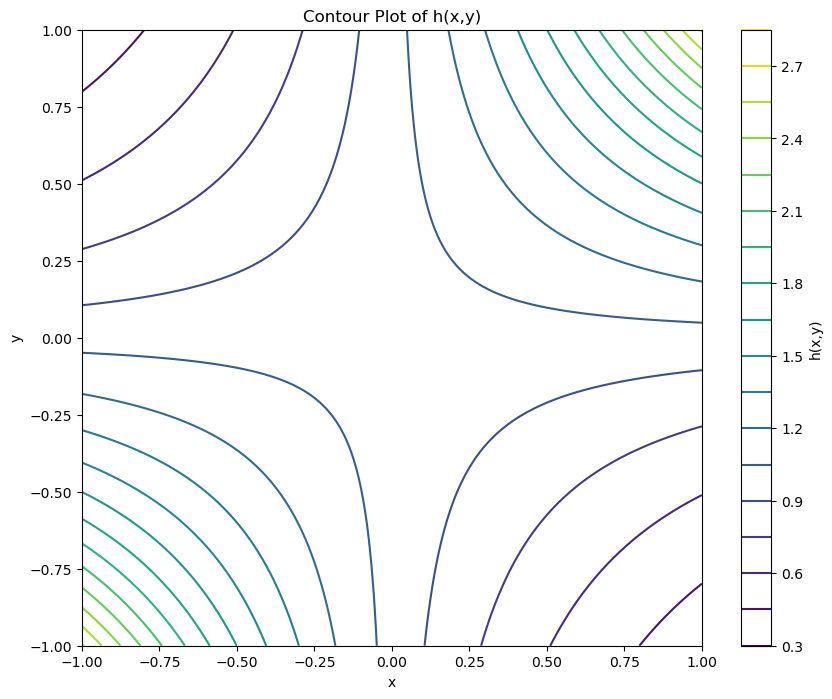

In [49]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x,y)')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of h(x,y)')

# Show the plot
plt.show()

## Problem 4

In [50]:
def grad_h(x, y):
    # Calculate the gradient of h at a point (x, y)
    grad_x = y * np.exp(x * y)
    grad_y = x * np.exp(x * y)
    return np.array([grad_x, grad_y])

In [51]:
# Create a list to store f(x, y) and (x, y) at each iteration

fx_list = []
xy_list = []

# Initialize x and y

x = 0.6
y = 0.6

# Set the learning rate

alpha = 0.1

# Set the maximum number of iterations

max_iter = 1000

# Perform gradient descent

for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Update x and y
    x = x - alpha * grad[0]
    y = y - alpha * grad[1]
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    
    # Append the value of h and (x, y) to the lists
    fx_list.append(fx)
    xy_list.append((x, y))

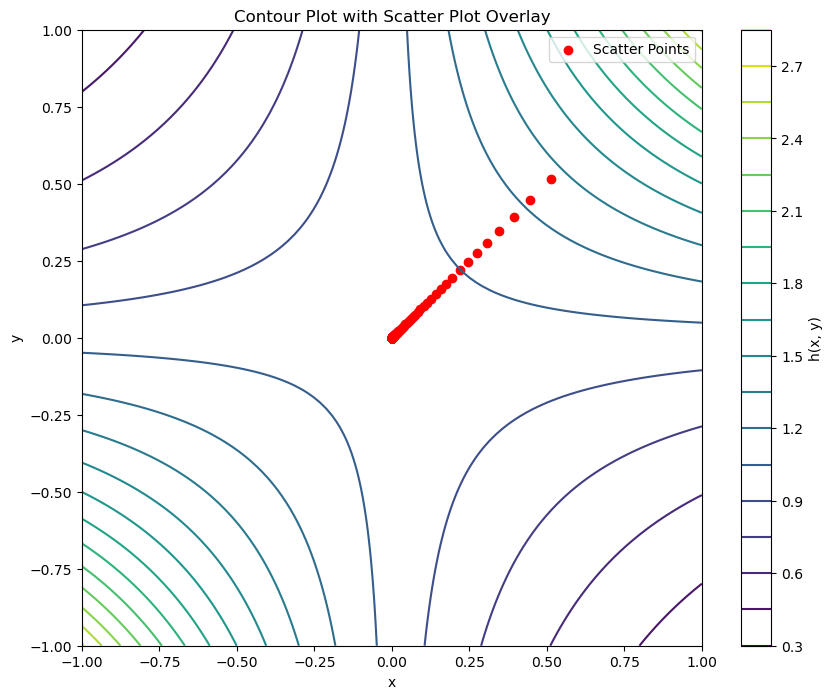

In [52]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)

x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

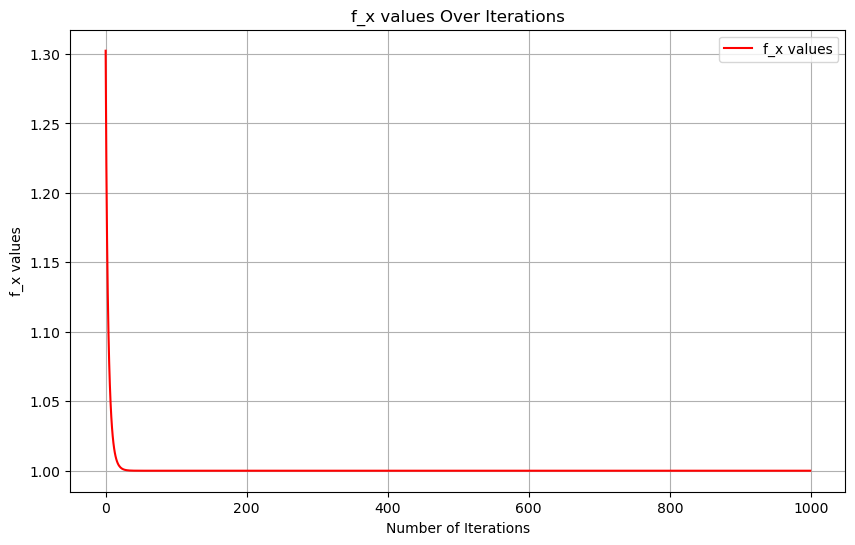

In [53]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(fx_list, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

## Problem 5

In [54]:
# Create a list to store f(x, y) and (x, y) at each iteration

fx_list = []
xy_list = []

# Initialize x and y

x = 0.6
y = 0.6

# Set the learning rate

alpha = 0.1

iter = 0

# Set the maximum number of iterations

max_iter = 1000

# Perform gradient descent

for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Update x and y and iter
    x = x - alpha * grad[0]
    y = y - alpha * grad[1]

    iter += 1

    # Decrease the learning rate by 1 / iter

    alpha = 1 / iter
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    
    # Append the value of h and (x, y) to the lists
    fx_list.append(fx)
    xy_list.append((x, y))

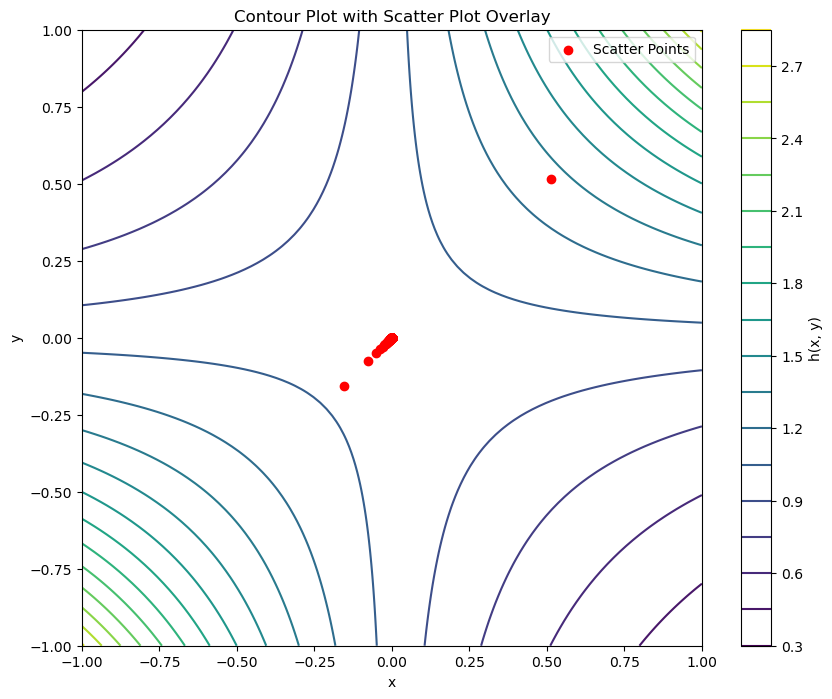

In [55]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)


x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

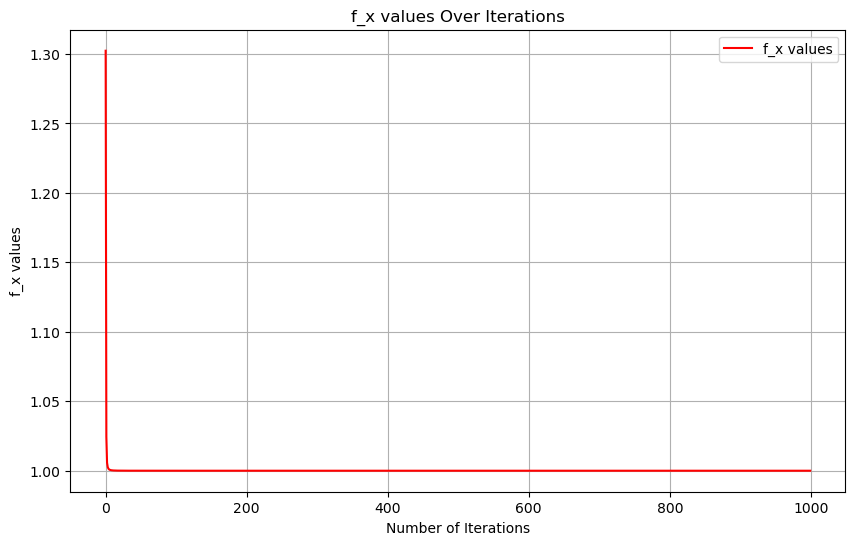

In [56]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(fx_list, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

## Problem 6

In [61]:
# Create a list to store expected_f and (x, y) at each iteration
expected_f = []
xy_list = []

# Initialize x and y
x = 0.6
y = 0.6

# Set the learning rate
alpha = 0.1
num_samples = 100

# Set the maximum number of iterations
max_iter = 1000

# Set the noise scale (sigma)
sigma = 0.1

# Perform perturbed gradient descent
for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Generate uncorrelated Gaussian noise
    noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
    
    # Update x and y with noise
    x = x - alpha * (grad[0] + noise[0])
    y = y - alpha * (grad[1] + noise[1])
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    xy_list.append((x, y))

    # Calculate expected function value using Monte Carlo sampling
    expected_fx = 0
    for _ in range(num_samples):
        sample_noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
        expected_fx += h(x + sample_noise[0], y + sample_noise[1])
    expected_fx /= num_samples
    expected_f.append(expected_fx)

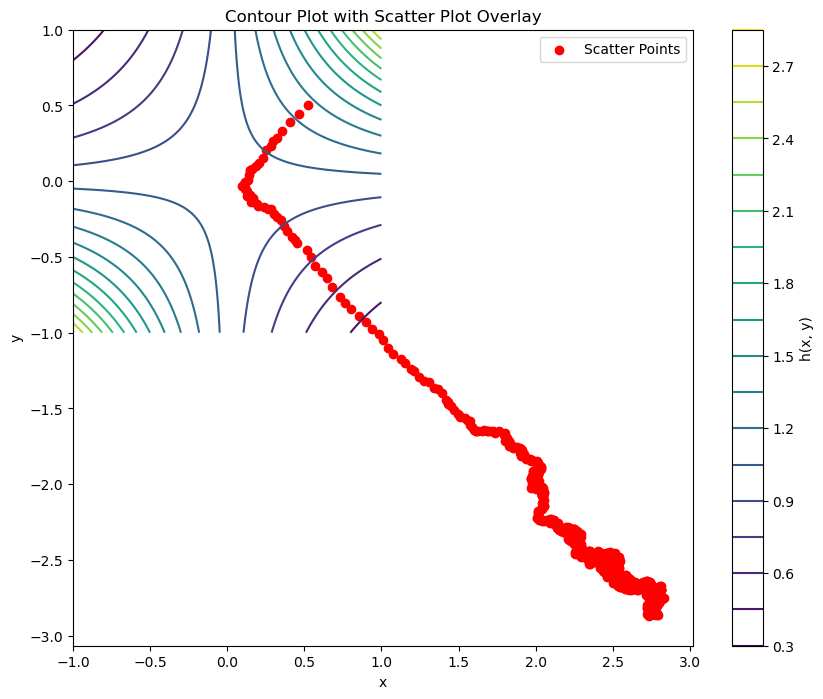

In [62]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)


x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

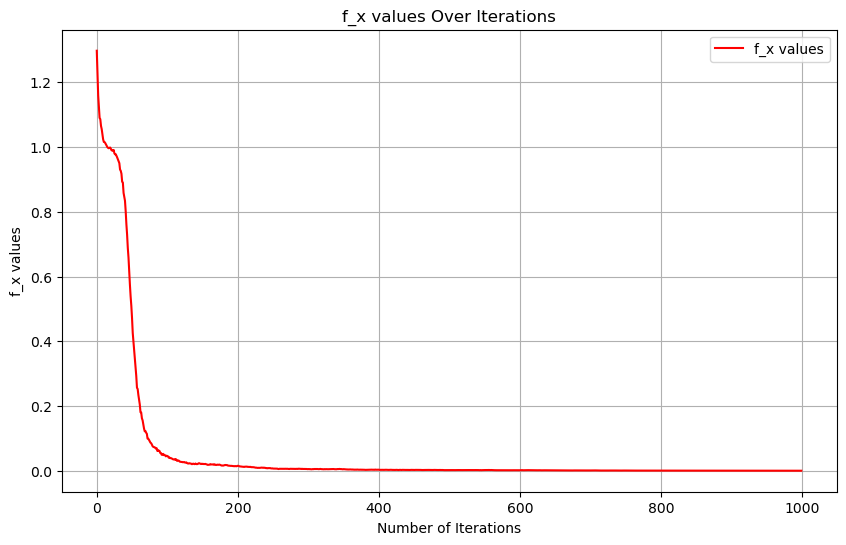

In [63]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(expected_f, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

## Problem 7

In [64]:
# Create a list to store expected_f and (x, y) at each iteration
expected_f = []
xy_list = []

# Initialize x and y
x = 0.6
y = 0.6

iter = 0

# Set the learning rate
alpha = 0.1
num_samples = 100

# Set the maximum number of iterations
max_iter = 1000

# Set the noise scale (sigma)
sigma = 0.1

# Perform perturbed gradient descent
for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Generate uncorrelated Gaussian noise
    noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
    
    # Update x and y with noise
    x = x - alpha * (grad[0] + noise[0])
    y = y - alpha * (grad[1] + noise[1])

    # Update iter and sigma
    iter += 1
    sigma = sigma / iter
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    xy_list.append((x, y))

    # Calculate expected function value using Monte Carlo sampling
    expected_fx = 0
    for _ in range(num_samples):
        sample_noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
        expected_fx += h(x + sample_noise[0], y + sample_noise[1])
    expected_fx /= num_samples
    expected_f.append(expected_fx)

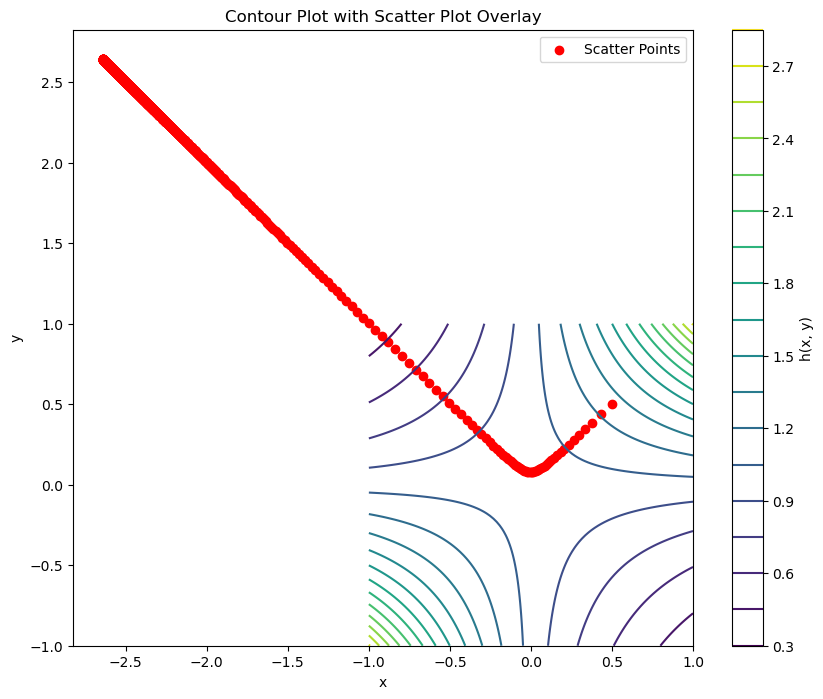

In [65]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)
x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

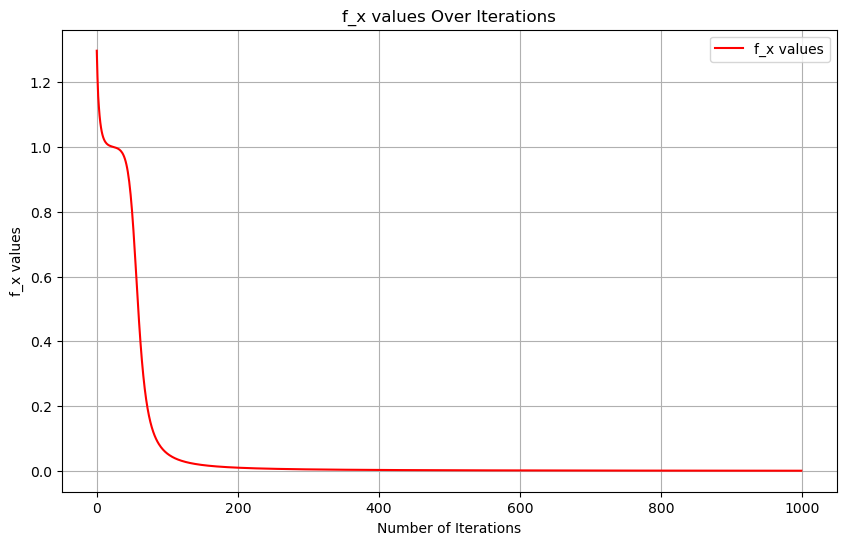

In [66]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(expected_f, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

## Problem 8

In [67]:
# Create a list to store expected_f and (x, y) at each iteration
expected_f = []
xy_list = []

# Initialize x and y
x = 0.6
y = 0.6

# Set the learning rate
alpha = 0.1
num_samples = 100

iter = 0

# Set the maximum number of iterations
max_iter = 1000

# Set the noise scale (sigma)
sigma = 0.1

# Perform perturbed gradient descent
for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Generate uncorrelated Gaussian noise
    noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
    
    # Update x and y with noise
    x = x - alpha * (grad[0] + noise[0])
    y = y - alpha * (grad[1] + noise[1])

    # Update iter and alpha
    iter += 1
    alpha = alpha / iter
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    xy_list.append((x, y))

    # Calculate expected function value using Monte Carlo sampling
    expected_fx = 0
    for _ in range(num_samples):
        sample_noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
        expected_fx += h(x + sample_noise[0], y + sample_noise[1])
    expected_fx /= num_samples
    expected_f.append(expected_fx)

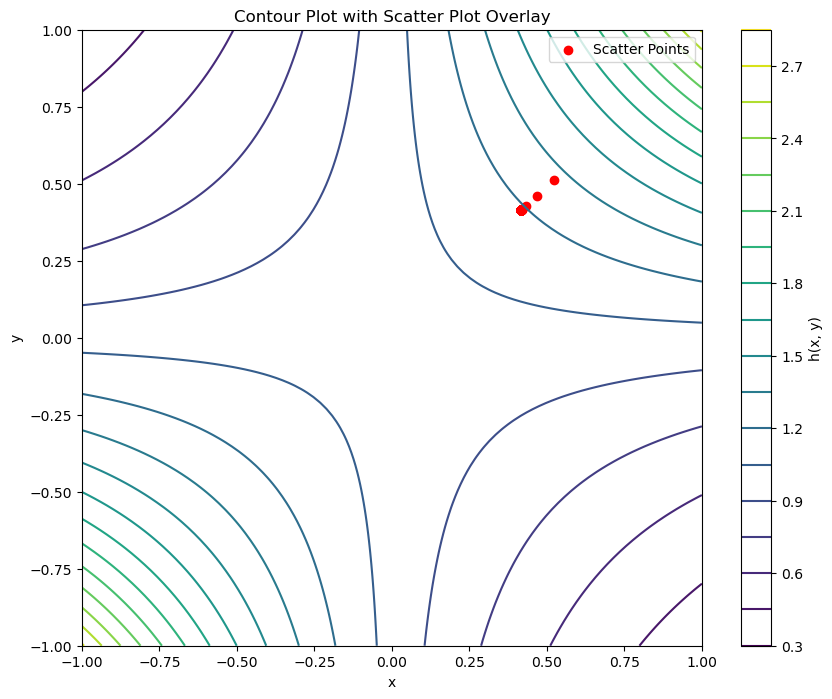

In [68]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)


x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

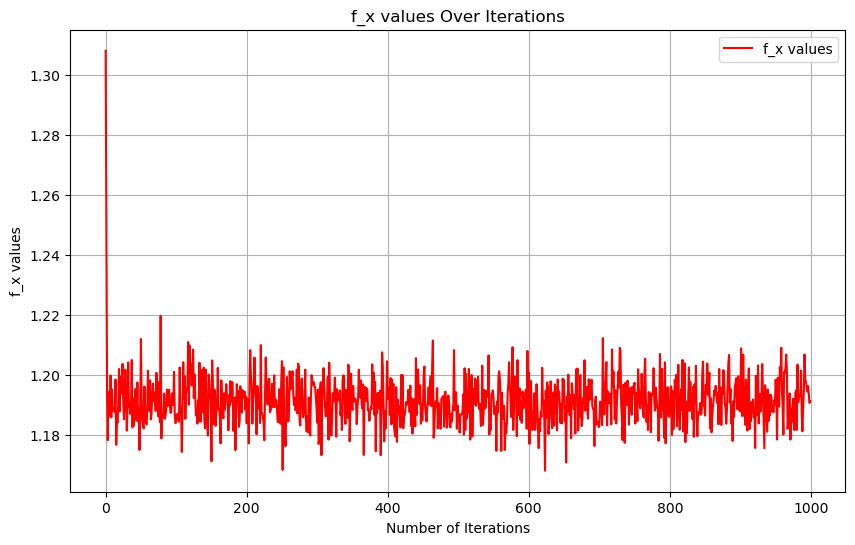

In [69]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(expected_f, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

## Problem 9

In [70]:
# Create a list to store expected_f and (x, y) at each iteration
expected_f = []
xy_list = []

# Initialize x and y
x = 0.6
y = 0.6

# Set the learning rate
alpha = 0.1
num_samples = 100

iter = 0

# Set the maximum number of iterations
max_iter = 1000

# Set the noise scale (sigma)
sigma = 0.1

# Perform perturbed gradient descent
for i in range(max_iter):
    # Calculate the gradient of h at the current point
    grad = grad_h(x, y)
    
    # Generate uncorrelated Gaussian noise
    noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
    
    # Update x and y with noise
    x = x - alpha * (grad[0] + noise[0])
    y = y - alpha * (grad[1] + noise[1])

    # Update iter and alpha and Sigma
    iter += 1
    alpha = alpha / iter
    sigma = sigma / iter
    
    # Calculate the value of h at the current point
    fx = h(x, y)
    xy_list.append((x, y))

    # Calculate expected function value using Monte Carlo sampling
    expected_fx = 0
    for _ in range(num_samples):
        sample_noise = np.random.multivariate_normal(mean=[0, 0], cov=[[sigma**2, 0], [0, sigma**2]])
        expected_fx += h(x + sample_noise[0], y + sample_noise[1])
    expected_fx /= num_samples
    expected_f.append(expected_fx)

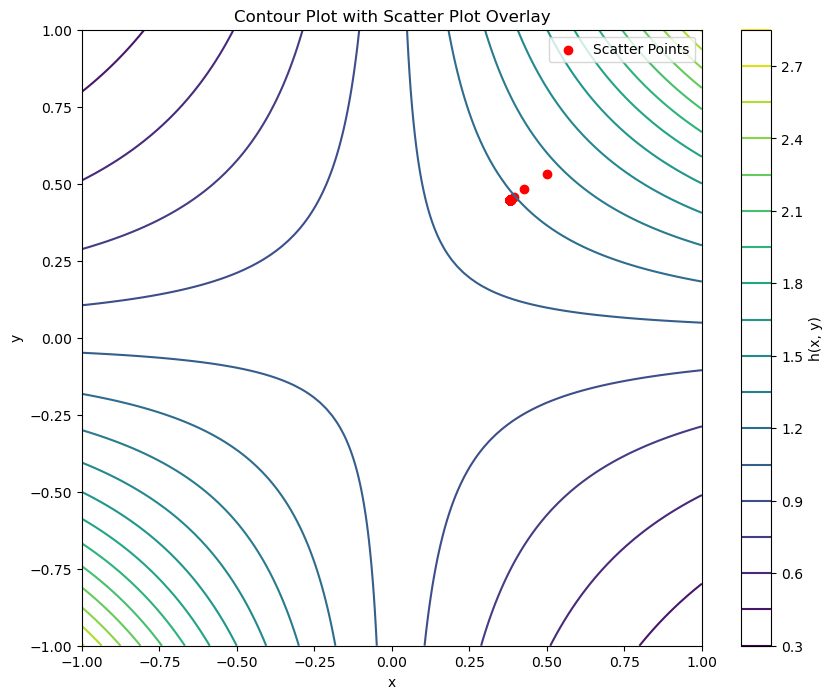

In [71]:
# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values
Z = h(X, Y)


x_scatter, y_scatter = zip(*xy_list)

# Create a plot
plt.figure(figsize=(10, 8))

# Create the contour plot
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour, label='h(x, y)')

# Overlay the scatter plot
plt.scatter(x_scatter, y_scatter, color='red', marker='o', label='Scatter Points')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot with Scatter Plot Overlay')

# Add a legend
plt.legend()

# Show the plot
plt.show()

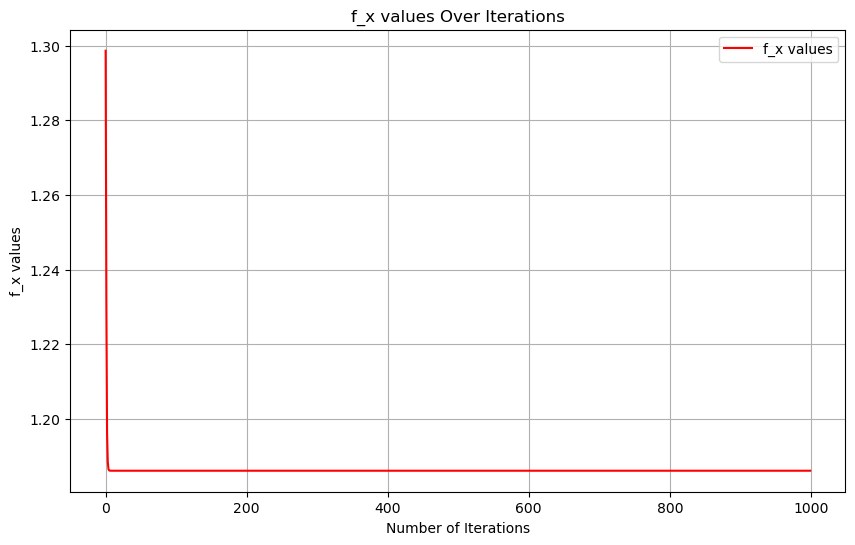

In [72]:
# Plot f_x values over iterations

plt.figure(figsize=(10, 6))

# Plot f_x values

plt.plot(expected_f, 'r-', label='f_x values')  # Red color

# Add labels and title

plt.xlabel('Number of Iterations')
plt.ylabel('f_x values')

plt.title('f_x values Over Iterations')

plt.legend()  # Show the legend

# Display the plot

plt.grid(True)
plt.show()

# Zeroth-order Optimisation

## Problem 2

### a

In [73]:
def golden_ratio_search(f, a, b, tol):
    # Golden ration
    gr = (np.sqrt(5) + 1) / 2
    # rho
    rho = 1 - 1 / gr

    # A list to store the (a_t, b_t)
    interval = []

    iter = 0

    while abs(b - a) > tol:
        # Calculate the new points
        x1 = a + rho * (b - a)
        x2 = b - rho * (b - a)

        # Update the iter

        iter += 1

        # Update the interval

        interval.append((a, b))

        # Update the interval
        if f(x1) >= f(x2):
            a = x1
        else:
            b = x2

    return (a + b) / 2, iter, interval

In [74]:
def g(x):
    return x * (x - 1) * (x - 3) * (x + 2)

In [76]:
a = 1
b = 3
tol = 1e-4

x_min, iter, interval = golden_ratio_search(g, a, b, tol)

print("Minima of g(x) is at x =", x_min)
print("Number of iterations =", iter)
print("The interval is", interval)

Minima of g(x) is at x = 2.3027522726894833
Number of iterations = 21
The interval is [(1, 3), (1.7639320225002104, 3), (1.7639320225002104, 2.5278640450004204), (2.0557280900008412, 2.5278640450004204), (2.23606797749979, 2.5278640450004204), (2.23606797749979, 2.416407864998738), (2.23606797749979, 2.347524157501472), (2.278640450004206, 2.347524157501472), (2.278640450004206, 2.3212129225086224), (2.2949016875157726, 2.3212129225086224), (2.2949016875157726, 2.3111629250273396), (2.2949016875157726, 2.304951684997056), (2.298740444966772, 2.304951684997056), (2.3011129275460567, 2.304951684997056), (2.3011129275460567, 2.303485410125341), (2.302019135253626, 2.303485410125341), (2.302579202417771, 2.303485410125341), (2.302579202417771, 2.3031392695819166), (2.302579202417771, 2.302925342961196), (2.302711416340475, 2.302925342961196), (2.302711416340475, 2.302843630263179)]


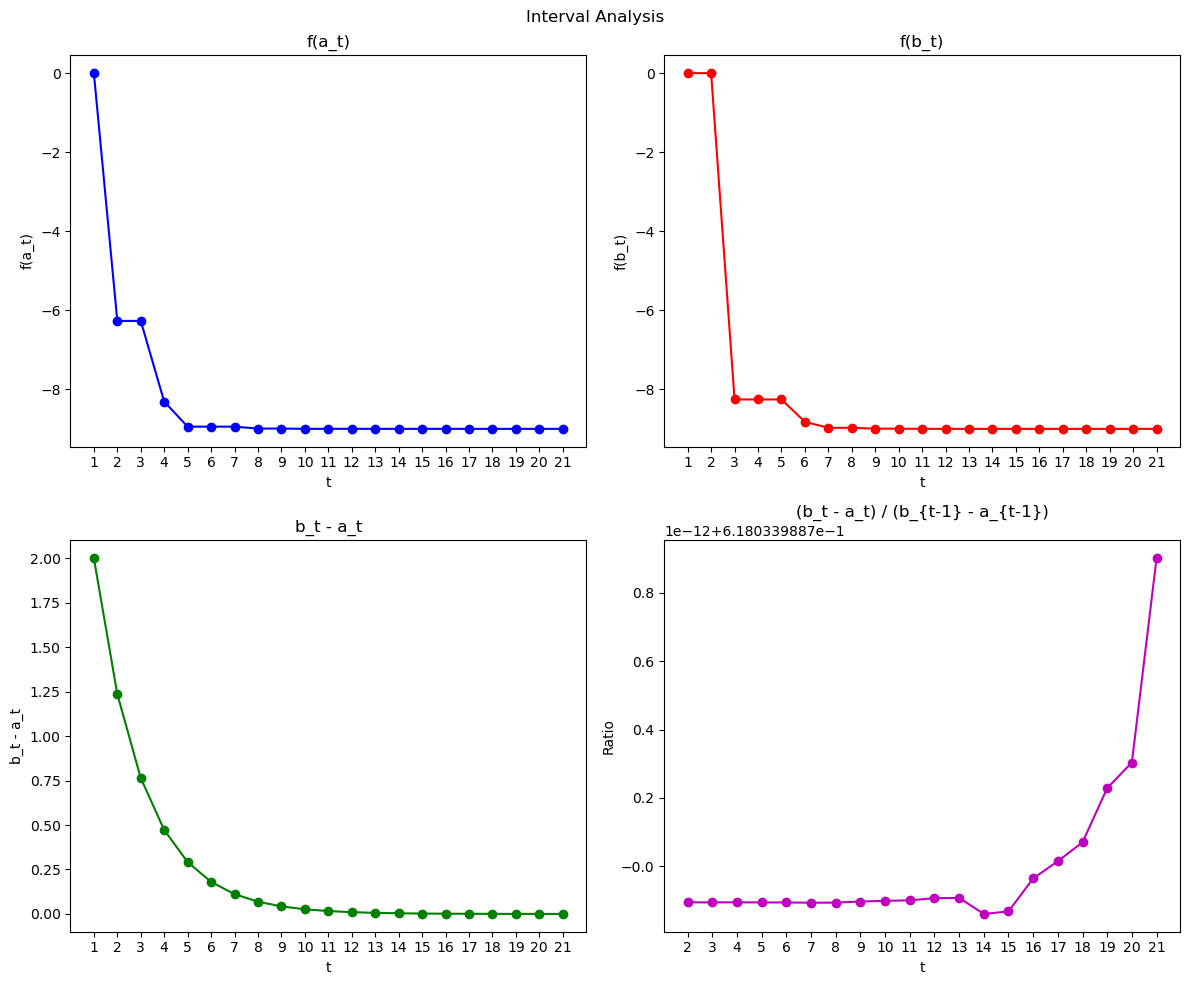

In [77]:
# Extract a_t and b_t values
a_values = [interval[0] for interval in interval]
b_values = [interval[1] for interval in interval]

# Calculate f(a_t) and f(b_t)
f_a_values = [g(a) for a in a_values]
f_b_values = [g(b) for b in b_values]

# Calculate (b_t - a_t)
diff_values = [b - a for a, b in interval]

# Calculate (b_t - a_t) / (b_{t-1} - a_{t-1})
ratio_values = [diff_values[i] / diff_values[i-1] if i > 0 else None for i in range(len(diff_values))]

# Create x-axis values
x_values = list(range(1, len(interval) + 1))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Interval Analysis')

# Plot f(a_t)
axs[0, 0].plot(x_values, f_a_values, 'bo-')
axs[0, 0].set_title('f(a_t)')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('f(a_t)')
axs[0, 0].set_xticks(x_values)

# Plot f(b_t)
axs[0, 1].plot(x_values, f_b_values, 'ro-')
axs[0, 1].set_title('f(b_t)')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('f(b_t)')
axs[0, 1].set_xticks(x_values)

# Plot (b_t - a_t)
axs[1, 0].plot(x_values, diff_values, 'go-')
axs[1, 0].set_title('b_t - a_t')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('b_t - a_t')
axs[1, 0].set_xticks(x_values)

# Plot (b_t - a_t) / (b_{t-1} - a_{t-1})
axs[1, 1].plot(x_values[1:], ratio_values[1:], 'mo-')
axs[1, 1].set_title('(b_t - a_t) / (b_{t-1} - a_{t-1})')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].set_xticks(x_values[1:])

plt.tight_layout()
plt.show()

### b

In [78]:
def fibonacci_search(f, a, b, n, tol):
    # Generate Fibonacci numbers
    fib = [1, 1]
    while fib[-1] < n:
        fib.append(fib[-1] + fib[-2])
    
    # Initialize variables
    i = len(fib) - 1
    x1 = a + (fib[i-2] / fib[i]) * (b - a)
    x2 = a + (fib[i-1] / fib[i]) * (b - a)
    
    interval = []
    
    while i > 2 and abs(b - a) > tol:
        interval.append((a, b))
        
        if f(x1) > f(x2):
            a = x1
            x1 = x2
            i -= 1
            x2 = a + (fib[i-1] / fib[i]) * (b - a)
        else:
            b = x2
            x2 = x1
            i -= 1
            x1 = a + (fib[i-2] / fib[i]) * (b - a)
    
    # Add the final interval
    interval.append((a, b))
    
    return (a + b) / 2, len(fib) - i, interval

In [79]:
x_min, iter, interval = fibonacci_search(g, a, b, 100, tol)

print("Minima of g(x) is at x =", x_min)
print("Number of iterations =", iter)
print("The interval is", interval)

Minima of g(x) is at x = 2.3055555555555554
Number of iterations = 10
The interval is [(1, 3), (1.7638888888888888, 3), (1.7638888888888888, 2.5277777777777777), (2.0555555555555554, 2.5277777777777777), (2.236111111111111, 2.5277777777777777), (2.236111111111111, 2.4166666666666665), (2.236111111111111, 2.3472222222222223), (2.2777777777777777, 2.3472222222222223), (2.2777777777777777, 2.3194444444444446), (2.2916666666666665, 2.3194444444444446)]


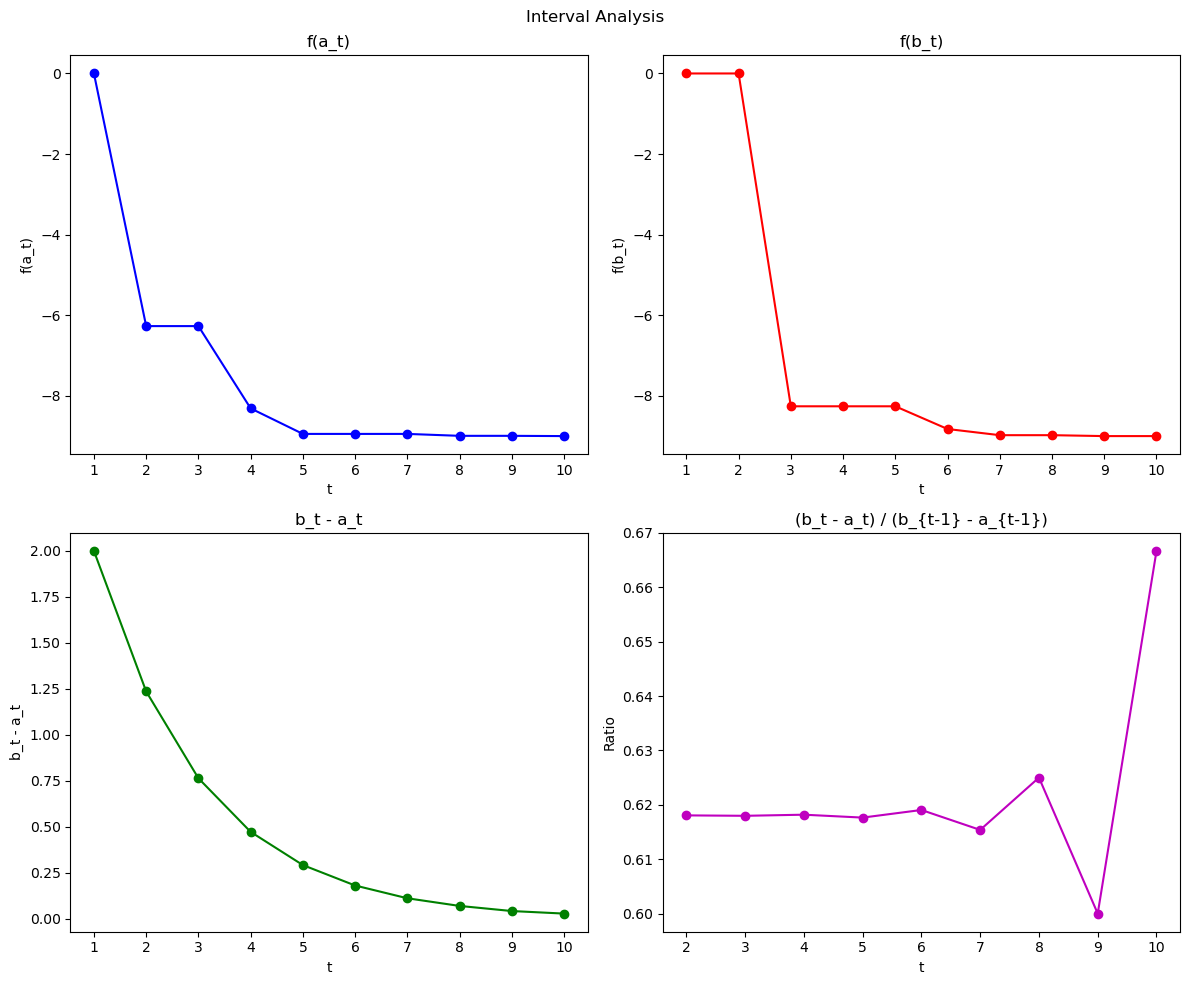

In [80]:
# Extract a_t and b_t values
a_values = [interval[0] for interval in interval]
b_values = [interval[1] for interval in interval]

# Calculate f(a_t) and f(b_t)
f_a_values = [g(a) for a in a_values]
f_b_values = [g(b) for b in b_values]

# Calculate (b_t - a_t)
diff_values = [b - a for a, b in interval]

# Calculate (b_t - a_t) / (b_{t-1} - a_{t-1})
ratio_values = [diff_values[i] / diff_values[i-1] if i > 0 else None for i in range(len(diff_values))]

# Create x-axis values
x_values = list(range(1, len(interval) + 1))

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Interval Analysis')

# Plot f(a_t)
axs[0, 0].plot(x_values, f_a_values, 'bo-')
axs[0, 0].set_title('f(a_t)')
axs[0, 0].set_xlabel('t')
axs[0, 0].set_ylabel('f(a_t)')
axs[0, 0].set_xticks(x_values)

# Plot f(b_t)
axs[0, 1].plot(x_values, f_b_values, 'ro-')
axs[0, 1].set_title('f(b_t)')
axs[0, 1].set_xlabel('t')
axs[0, 1].set_ylabel('f(b_t)')
axs[0, 1].set_xticks(x_values)

# Plot (b_t - a_t)
axs[1, 0].plot(x_values, diff_values, 'go-')
axs[1, 0].set_title('b_t - a_t')
axs[1, 0].set_xlabel('t')
axs[1, 0].set_ylabel('b_t - a_t')
axs[1, 0].set_xticks(x_values)

# Plot (b_t - a_t) / (b_{t-1} - a_{t-1})
axs[1, 1].plot(x_values[1:], ratio_values[1:], 'mo-')
axs[1, 1].set_title('(b_t - a_t) / (b_{t-1} - a_{t-1})')
axs[1, 1].set_xlabel('t')
axs[1, 1].set_ylabel('Ratio')
axs[1, 1].set_xticks(x_values[1:])

plt.tight_layout()
plt.show()